In [ ]:
pip install nltk wordcloud autocorrect emoji bs4 regex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 19.2 MB/s eta 0:00:00
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=319fd62a9ed504f3c9c09e945f4e04cff21696191e28ca1ab437b54fc80fdd34
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
import pdfplumber

def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        full_text = ''
        for page in pdf.pages:
            full_text += page.extract_text()
    return full_text

pdf_path = '/content/harry-potter-sorcerers-stone.pdf'
book_text = extract_text_from_pdf(pdf_path)


In [ ]:
book_text

"HP 1 - Harry Potter and the\nSorcerer's Stone\nHarry Potter and the Sorcerer's Stone\nHarry Potter\n&\nThe Sorcerer’s Stone\nby J.K. RowlingHP 1 - Harry Potter and the\nSorcerer's StoneCHAPTER ONE\nTHE BOY WHO LIVED\nM r. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much. They were the last people\nyou’d expect to be involved in anything strange or mysterious, because they just\ndidn’t hold with such nonsense.\nMr. Dursley was the director of a firm called Grunnings, which made\ndrills. He was a big, beefy man with hardly any neck, although he did have a\nvery large mustache. Mrs. Dursley was thin and blonde and had nearly twice the\nusual amount of neck, which came in very useful as she spent so much of her\ntime craning over garden fences, spying on the neighbors. The Dursleys had a\nsmall son called Dudley and in their opinion there was no finer boy anywhere.\nThe Dursleys had everything they wanted, but they als

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import re
import string
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from autocorrect import Speller
import emoji
import regex

# Initialize NLTK components and Speller for spelling correction
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
spell = Speller()

# Define common chat words and their expanded forms
chat_words_map = {
    "u": "you",
    "r": "are",
    "btw": "by the way",
    "idk": "I don't know",
    "lol": "laughing out loud"
    # Add more as needed
}

# Regex patterns for URLs and HTML
url_pattern = re.compile(r'https?://\S+|www\.\S+')
html_pattern = re.compile(r'<.*?>')

# Define function to convert emoticons to words (basic example)
emoticon_dict = {
   u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

from collections import Counter

# Function to create frequent words list from book_text
def get_frequent_words(text, top_n=25):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text and count word frequencies
    words = text.split()
    word_counts = Counter(words)

    # Get the most common words
    frequent_words = [word for word, count in word_counts.most_common(top_n)]

    return frequent_words

# Get the frequent words from the book text
frequent_words = get_frequent_words(book_text)

def preprocess_text(text, frequent_words=None, min_word_freq=2):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(url_pattern, '', text)

    # 3. Remove HTML tags
    text = re.sub(html_pattern, '', text)

    # 4. Convert emojis to words
    text = emoji.demojize(text, delimiters=(" ", " "))

    # 5. Convert emoticons to words
    for emoticon, meaning in emoticon_dict.items():
        text = text.replace(emoticon, meaning)

    # 6. Remove punctuation and special characters (excluding emojis and emoticons already handled)
    text = re.sub(r'[^\w\s]', '', text)

    # 7. Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # 8. Convert chat words
    words = [chat_words_map.get(word, word) for word in words]

    # 9. Remove frequent words (if provided)
    if frequent_words:
        words = [word for word in words if word not in frequent_words]

    # 10. Remove rare words (words that appear less than `min_word_freq` times)
    word_counts = Counter(words)
    words = [word for word in words if word_counts[word] >= min_word_freq]

    # 11. Stemming
    stemmed_words = [stemmer.stem(word) for word in words]

    # 12. Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    # 13. Spelling correction
    corrected_words = [spell(word) for word in lemmatized_words]

    return ' '.join(corrected_words)

# Example usage
text = book_text

processed_text = preprocess_text(text,frequent_words=frequent_words)
print(processed_text)


1 potter soccer stone potter soccer stone potter soccer stone 1 potter soccer stonechapt one boy live mr dursley number four river drive proud say perfectly normal thank much last people you expect involve any strong mystery didnt hold nonsense mr dursley director firm call run made drill big man hardly neck although lang mustache mr dursley thin blond nearly twice usual neck came use spent much time crane garden spi neighbor dursley small son call medley opinion finer boy anywhere dursley every want also secret greatest fear somebody would didnt think could bear anyone found potter mr potter mr dursley sister hadn met sever year fact mr dursley pretend didnt sister sister possible dursley shoulder think neighbor would say potter arxiv street dursley knew potter small son never even seen boy not good reason keep potter away didnt want medley mix child like mr mr dursley woke dull gray tuesday story start not cloud sky outside suggest strong mystery thing would soon happen country mr du

In [ ]:
pip install wordcloud matplotlib


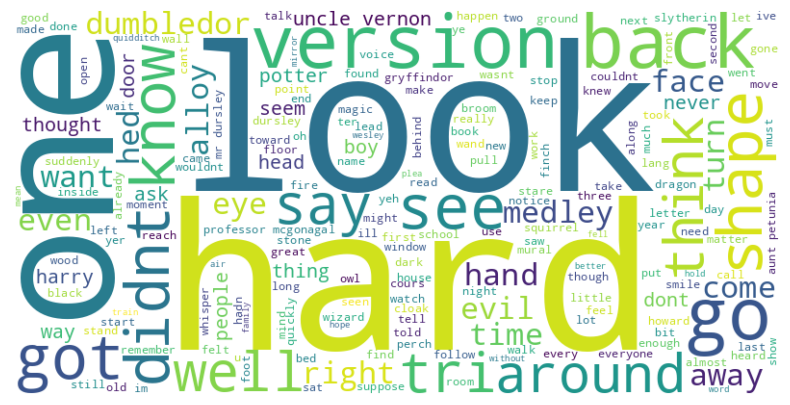

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(preprocessed_text):
    # Create a word cloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_text)

    # Plot the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # No axis
    plt.show()

generate_wordcloud(processed_text)

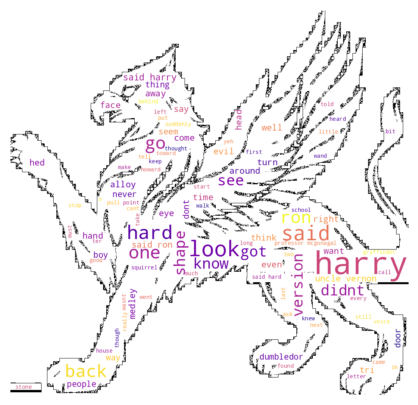

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Function to generate and display a WordCloud with custom settings
def generate_custom_wordcloud(preprocessed_text, mask_image_path=None):
    # Set up a custom shape mask (optional)
    mask = None
    if mask_image_path:
        mask = np.array(Image.open(mask_image_path))

    # Create WordCloud object with customization
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',  # Set the background color
        max_words=100,  # Limit the number of words
        max_font_size=110,  # Set the max font size
        min_font_size=10,  # Set the min font size
        colormap='plasma',  # Use a custom color palette
        contour_color='black',  # Add a contour with a specific color
        contour_width=1,  # Set contour width
        mask=mask,  # Optional custom shape
        relative_scaling=0.5  # Adjust scaling of words
    ).generate(preprocessed_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # No axis
    plt.show()


mask_image_path ="/content/griffin1.jpg"  # Path to a custom mask image

generate_custom_wordcloud(processed_text, mask_image_path)
